In [63]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
conn = sqlite3.connect('STAFF.db')
table_name = 'SALES'

## EXTRACT PHASE

In [2]:
URL = "https://www.trendyol.com/sr?q=monitor&qt=monitor&st=monitor&os=1"

In [3]:
r = requests.get(URL, "lxml")

In [4]:
if r.status_code == 200:
    html_content = r.content
    print("Your response is succesfully return.")
else:
    print("There is an error.:", response.status_code)

Your response is succesfully return.


In [5]:
soup = BeautifulSoup(html_content, "html.parser")

In [6]:
product_names = soup.find_all("span", class_="prdct-desc-cntnr-name hasRatings")
product_name_list = []
for product_name in product_names:
    product_name_list.append(product_name.text.strip())

len(product_name_list)

21

In [76]:
product_price = soup.find_all("div", class_="prc-box-dscntd")

price_list = []
for product_p in product_price:
    price_list.append(product_p.text.strip('TL'))
len(price_list)
del price_list[5]
del price_list[7]
del price_list[13]
price_list[6] = '1.683'

In [77]:
product_evaluations = soup.find_all("span", class_="ratingCount")
product_evaluation_list = []
for product_evaluation in product_evaluations:
    product_evaluation_list.append(product_evaluation.text.strip('()'))

len(product_evaluation_list)


21

In [78]:
product_links = soup.find_all('a')
product_links
link_list = []
link = 'https://www.trendyol.com/'
for product_link in product_links:
    href = product_link.get('href')
    if href:
        link_list.append(link+href)

new_link_list=[]
for link in link_list:
    if 'boutiqueId=61&merchantId' in link:
        new_link_list.append(link)
new_link_list

['https://www.trendyol.com//samsung/essential-s3-ls22c310eauxuf-22-5ms-75hz-fullhd-amd-freesync-ips-led-monitor-p-691047236?boutiqueId=61&merchantId=238093',
 'https://www.trendyol.com//casper/excalibur-m-e238fhd-g-23-8-200hz-1ms-300nit-hdmi-display-curved-freesync-g-sync-fhd-led-monitor-p-375186975?boutiqueId=61&merchantId=114258',
 'https://www.trendyol.com//monster/aryond-a27-v1-2-27-inc-fhd-1920x1080-240-hz-1-ms-ince-cerveve-hoparlorlu-curved-oyuncu-monitoru-p-274238018?boutiqueId=61&merchantId=105286&advertItems=eyJhZHZlcnRJZCI6IjMyNDZhZmE3LThiOWYtNDA1MC04Y2Y4LTY1ZmE1NmI2ZjQyZSIsInNvcnRpbmdTY29yZSI6MC4wNzE0NzYwNDUxMzE2ODMzNiwiYWRTY29yZSI6MC4wNTA3NjQyMzY1OTkyMDY5MjQsImFkU2NvcmVzIjp7IjEiOjAuMDUwNzY0MjM2NTk5MjA2OTI0LCIyIjowLjA1MDc2NDIzNjU5OTIwNjkyNH0sImNwYyI6MS40MDgwMDAwMDAwMDAwMDAxLCJtaW5DcGMiOjAuMDEsImVDcGMiOjAuOTM1NzcwNDQ0MzY2MDU2OSwiYWR2ZXJ0U2xvdCI6MSwib3JkZXIiOjIsInNlYXJjaFRlcm0iOiJtb25pdG9yIiwiYXR0cmlidXRlcyI6IiIsInJlbGV2YW5jeUtleSI6Im1vbml0b3IifQ==',
 'https://www.trendyol.com

In [69]:
product_company = soup.find_all("span", class_="prdct-desc-cntnr-ttl")

product_company_list = []
for product_c in product_company:
    product_company_list.append(product_c.get('title'))

product_company_list
del product_company_list[5]
del product_company_list[7]
del product_company_list[13]
product_company_list[6] = 'upTech'
product_company_list

['Samsung',
 'Casper',
 'Monster',
 'LENOVO',
 'Samsung',
 'Casper',
 'upTech',
 'ASUS',
 'Monster',
 'Samsung',
 'LG',
 'ACER',
 'LG',
 'Gamepower',
 'HITACHI',
 'Casper',
 'Xiaomi',
 'Samsung',
 'Rampage',
 'LENOVO',
 'Casper']

## TRANSFORM PHASE

In [79]:
# Creating an empty DF and put the data that we extracted.
columns = ['Product_Name', 'Product_Company', 'Product_Price', 'Product_Evaluation']  
df = pd.DataFrame(columns=columns)
df['Product_Name'] = product_name_list
df['Product_Company'] = product_company_list
df['Product_Price'] = price_list
df['Product_Evaluation'] = product_evaluation_list
df

,Product_Name,Product_Company,Product_Price,Product_Evaluation
0,"ESSENTIAL S3 LS22C310EAUXUF 22"" 5MS 75HZ FULLH...",Samsung,2.249,62
1,"Excalibur M.E238FHD-G 23.8"" 200HZ 1MS 300NIT (...",Casper,4.209,1160
2,Aryond A27 V1.2 27 Inç Fhd 1920x1080 240 Hz 1 ...,Monster,6.499,148
3,"L24i-40 23.8"" 4ms 100Hz (HDMI+VGA) AMD FreeSyn...",LENOVO,3.099,23
4,"24"" Odyssey G3 Ls24ag320nuxuf 1ms 165 Hz Pivot...",Samsung,4.399,914
5,"Excalibur M.E238FIF-D 23.8"" 200HZ 1MS 300NIT F...",Casper,3.799,37
6,"HD190 19"" Geniş Ekran 75 Hz 5ms (VGA,HDMI) Led...",upTech,1.683,64
7,Tuf Gaming Vg247q1a 23.8 Inç 165hz 1ms Full Hd...,ASUS,4.449,1143
8,"Aryond A24 V1.1 24"" 144 Hz 1 MS Hoparlörlü Ful...",Monster,4.699,79
9,Ls24c360eauxuf S3 4ms Kavisli (CURVED) Hdmı Vg...,Samsung,3.015,239


In [80]:
df['Product_Name'] = df['Product_Name'].astype(str)
df['Product_Company'] = df['Product_Company'].astype(str)
df['Product_Evaluation'] = df['Product_Evaluation'].astype(np.int64)
df['Product_Price'] = df['Product_Price'].str.replace(',', '').astype(float)

In [178]:
df['Product_Price'] = df['Product_Price'].round(4)

In [179]:
df

,Product_Name,Product_Company,Product_Price,Product_Evaluation
0,"ESSENTIAL S3 LS22C310EAUXUF 22"" 5MS 75HZ FULLH...",Samsung,2.2490,62
1,"Excalibur M.E238FHD-G 23.8"" 200HZ 1MS 300NIT (...",Casper,4.2090,1160
2,Aryond A27 V1.2 27 Inç Fhd 1920x1080 240 Hz 1 ...,Monster,6.4990,148
3,"L24i-40 23.8"" 4ms 100Hz (HDMI+VGA) AMD FreeSyn...",LENOVO,3.0990,23
4,"24"" Odyssey G3 Ls24ag320nuxuf 1ms 165 Hz Pivot...",Samsung,4.3990,914
5,"Excalibur M.E238FIF-D 23.8"" 200HZ 1MS 300NIT F...",Casper,3.7990,37
6,"HD190 19"" Geniş Ekran 75 Hz 5ms (VGA,HDMI) Led...",upTech,1.6830,64
7,Tuf Gaming Vg247q1a 23.8 Inç 165hz 1ms Full Hd...,ASUS,4.4490,1143
8,"Aryond A24 V1.1 24"" 144 Hz 1 MS Hoparlörlü Ful...",Monster,4.6990,79
9,Ls24c360eauxuf S3 4ms Kavisli (CURVED) Hdmı Vg...,Samsung,3.0150,239


## LOAD PHASE

In [180]:
df.to_csv('trendyol_sales.csv')
df.to_sql(table_name, conn, if_exists='replace', index=False)

21

## SOME DATA ANALYTICS ON THE DATA THAT WE USED IN THE ETL PROCESS.

In [181]:
query_statement = f"""
SELECT Product_Company as COMPANY, Count(Product_Company) as COUNT, avg(Product_Price) as AVG_PRICE, avg(Product_Evaluation) as AVG_EVALUATION
FROM {table_name}
GROUP BY Product_Company
ORDER BY COUNT DESC
"""
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
avg_CPE = pd.DataFrame(query_output)
avg_CPE


SELECT Product_Company as COMPANY, Count(Product_Company) as COUNT, avg(Product_Price) as AVG_PRICE, avg(Product_Evaluation) as AVG_EVALUATION
FROM SALES
GROUP BY Product_Company
ORDER BY COUNT DESC



,COMPANY,COUNT,AVG_PRICE,AVG_EVALUATION
0,Samsung,4,4.54075,334.25
1,Casper,4,5.23595,421.25
2,Monster,2,5.59900,113.50
3,LG,2,3.76400,40.50
4,LENOVO,2,2.98400,47.00
5,upTech,1,1.68300,64.00
6,Xiaomi,1,2.42900,384.00
7,Rampage,1,4.96480,149.00
8,HITACHI,1,1.79500,11.00
9,Gamepower,1,7.13840,114.00


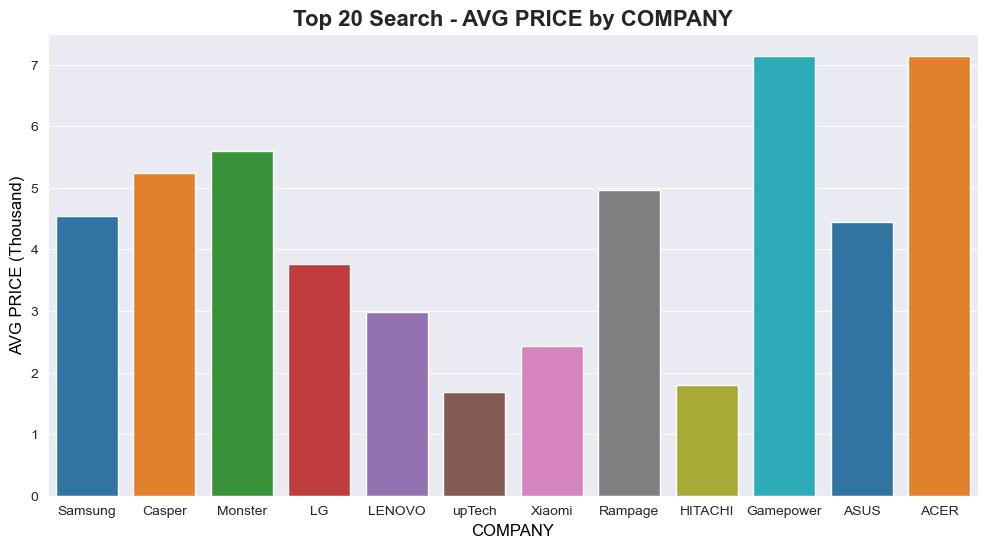

In [182]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.barplot(x='COMPANY', y='AVG_PRICE', data=avg_CPE, palette='tab10')
plt.title('Top 20 Search - AVG PRICE by COMPANY',fontsize=16, fontweight='bold')
plt.xlabel('COMPANY', fontsize=12, color='black')
plt.ylabel('AVG PRICE (Thousand)', fontsize=12, color='black')
plt.show()

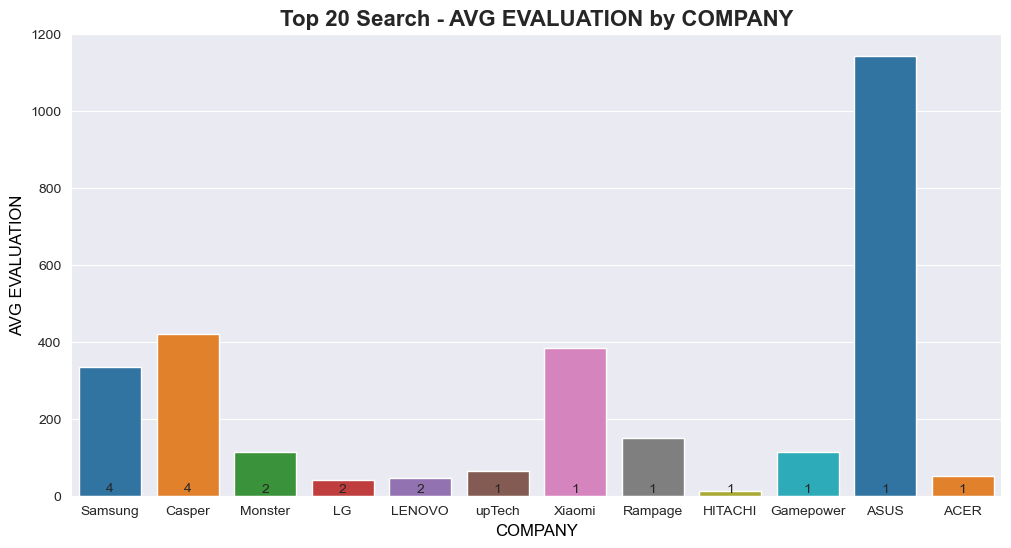

In [183]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.barplot(x='COMPANY', y='AVG_EVALUATION', data=avg_CPE, palette='tab10')

for i, count in enumerate(avg_CPE['COUNT']):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.title('Top 20 Search - AVG EVALUATION by COMPANY',fontsize=16, fontweight='bold')
plt.xlabel('COMPANY', fontsize=12, color='black')
plt.ylabel('AVG EVALUATION', fontsize=12, color='black')
plt.show()

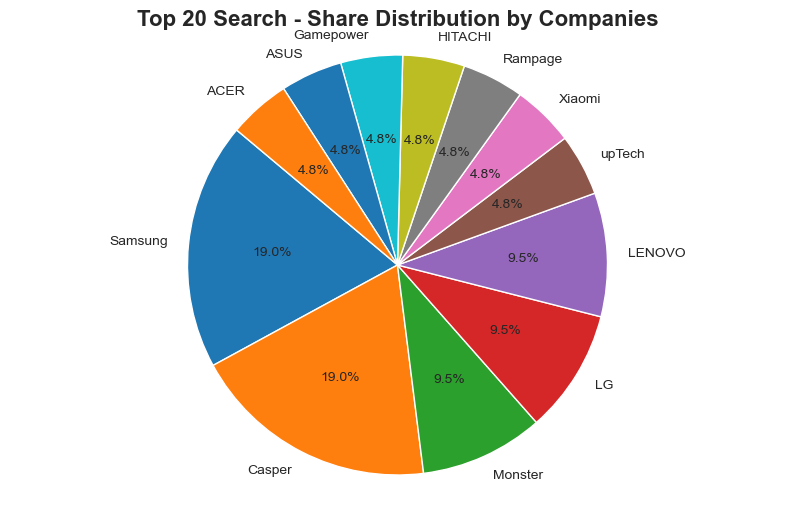

In [184]:
companies = avg_CPE['COMPANY']
counts = avg_CPE['COUNT']

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=companies, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 20 Search - Share Distribution by Companies', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.show()

In [185]:
query_statement2 = f"""
SELECT Product_Company AS COMPANY, Product_Price AS PRICE, Product_Evaluation as EVALUATION
FROM {table_name}

"""
query_output2 = pd.read_sql(query_statement2, conn)
print(query_statement2)
price_evaluation = pd.DataFrame(query_output2)
price_evaluation = price_evaluation.head(20)
price_evaluation


SELECT Product_Company AS COMPANY, Product_Price AS PRICE, Product_Evaluation as EVALUATION
FROM SALES




,COMPANY,PRICE,EVALUATION
0,Samsung,2.2490,62
1,Casper,4.2090,1160
2,Monster,6.4990,148
3,LENOVO,3.0990,23
4,Samsung,4.3990,914
5,Casper,3.7990,37
6,upTech,1.6830,64
7,ASUS,4.4490,1143
8,Monster,4.6990,79
9,Samsung,3.0150,239


In [186]:
price_evaluation.corr()

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_12028\3385668902.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_evaluation.corr()


,PRICE,EVALUATION
PRICE,1.000000,0.029198
EVALUATION,0.029198,1.000000


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_12028\4209905587.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(price_evaluation.corr(), annot=True, cmap='coolwarm', fmt=".2f")


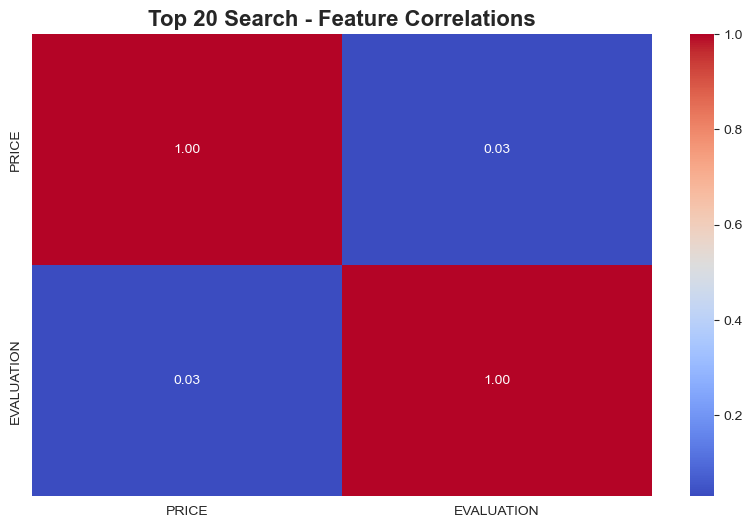

In [187]:
plt.figure(figsize=(10, 6))
sns.heatmap(price_evaluation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 20 Search - Feature Correlations', fontsize=16, fontweight='bold')
plt.show()

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_12028\292959122.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='PRICE', y='EVALUATION',data=price_evaluation, palette='tab10')


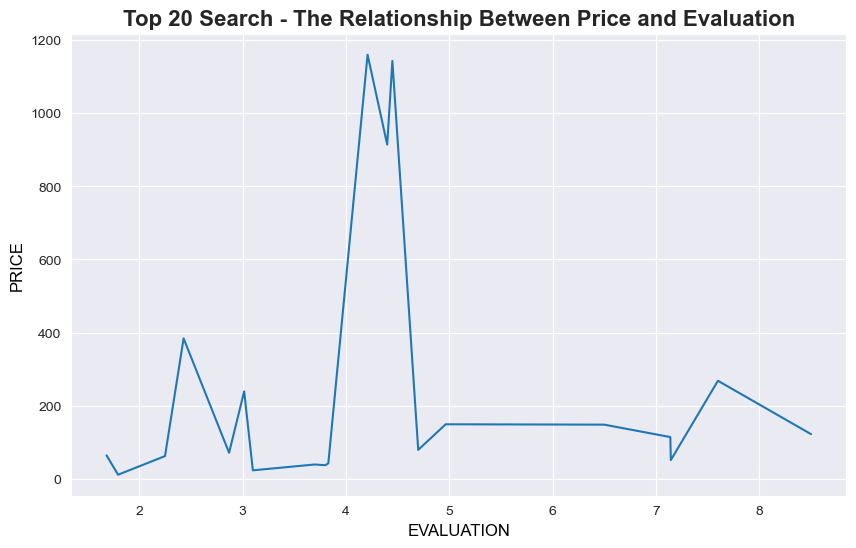

In [188]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='PRICE', y='EVALUATION',data=price_evaluation, palette='tab10')
plt.title('Top 20 Search - The Relationship Between Price and Evaluation', fontsize=16, fontweight='bold')
plt.xlabel('EVALUATION', fontsize=12, color='black')
plt.ylabel('PRICE', fontsize=12, color='black')
plt.grid(True)
plt.show()

In [189]:
query_statement3 = f"""
SELECT Product_Name as NAME, Product_Company as COMPANY, Product_Price AS PRICE
FROM {table_name}
ORDER BY PRICE DESC
"""
query_output3 = pd.read_sql(query_statement3, conn)
print(query_statement3)
price_name_company = pd.DataFrame(query_output3)
price_name_company = price_name_company.head(10)
price_name_company


SELECT Product_Name as NAME, Product_Company as COMPANY, Product_Price AS PRICE
FROM SALES
ORDER BY PRICE DESC



,NAME,COMPANY,PRICE
0,"Ls43bm700upxuf 43"" 109 Ekran 4k Ultra Hd Led M...",Samsung,8.5000
1,"Excalibur M.E315FHD-G 31.5"" 240HZ 1MS 300NIT (...",Casper,7.5990
2,Kg272s Zeroframe 27” 165hz 2ms (2xhdmı+display...,ACER,7.1432
3,Intense X40 27'' 1ms 240hz Curved Rgb Gaming M...,Gamepower,7.1384
4,Aryond A27 V1.2 27 Inç Fhd 1920x1080 240 Hz 1 ...,Monster,6.4990
5,"Excalibur M.E27FHD-G 27"" 200HZ 1MS 300NIT (HDM...",Casper,5.3368
6,"Voyager Vy27r165c 27"" Inç 165hz 1ms Freesync P...",Rampage,4.9648
7,"Aryond A24 V1.1 24"" 144 Hz 1 MS Hoparlörlü Ful...",Monster,4.6990
8,Tuf Gaming Vg247q1a 23.8 Inç 165hz 1ms Full Hd...,ASUS,4.4490
9,"24"" Odyssey G3 Ls24ag320nuxuf 1ms 165 Hz Pivot...",Samsung,4.3990


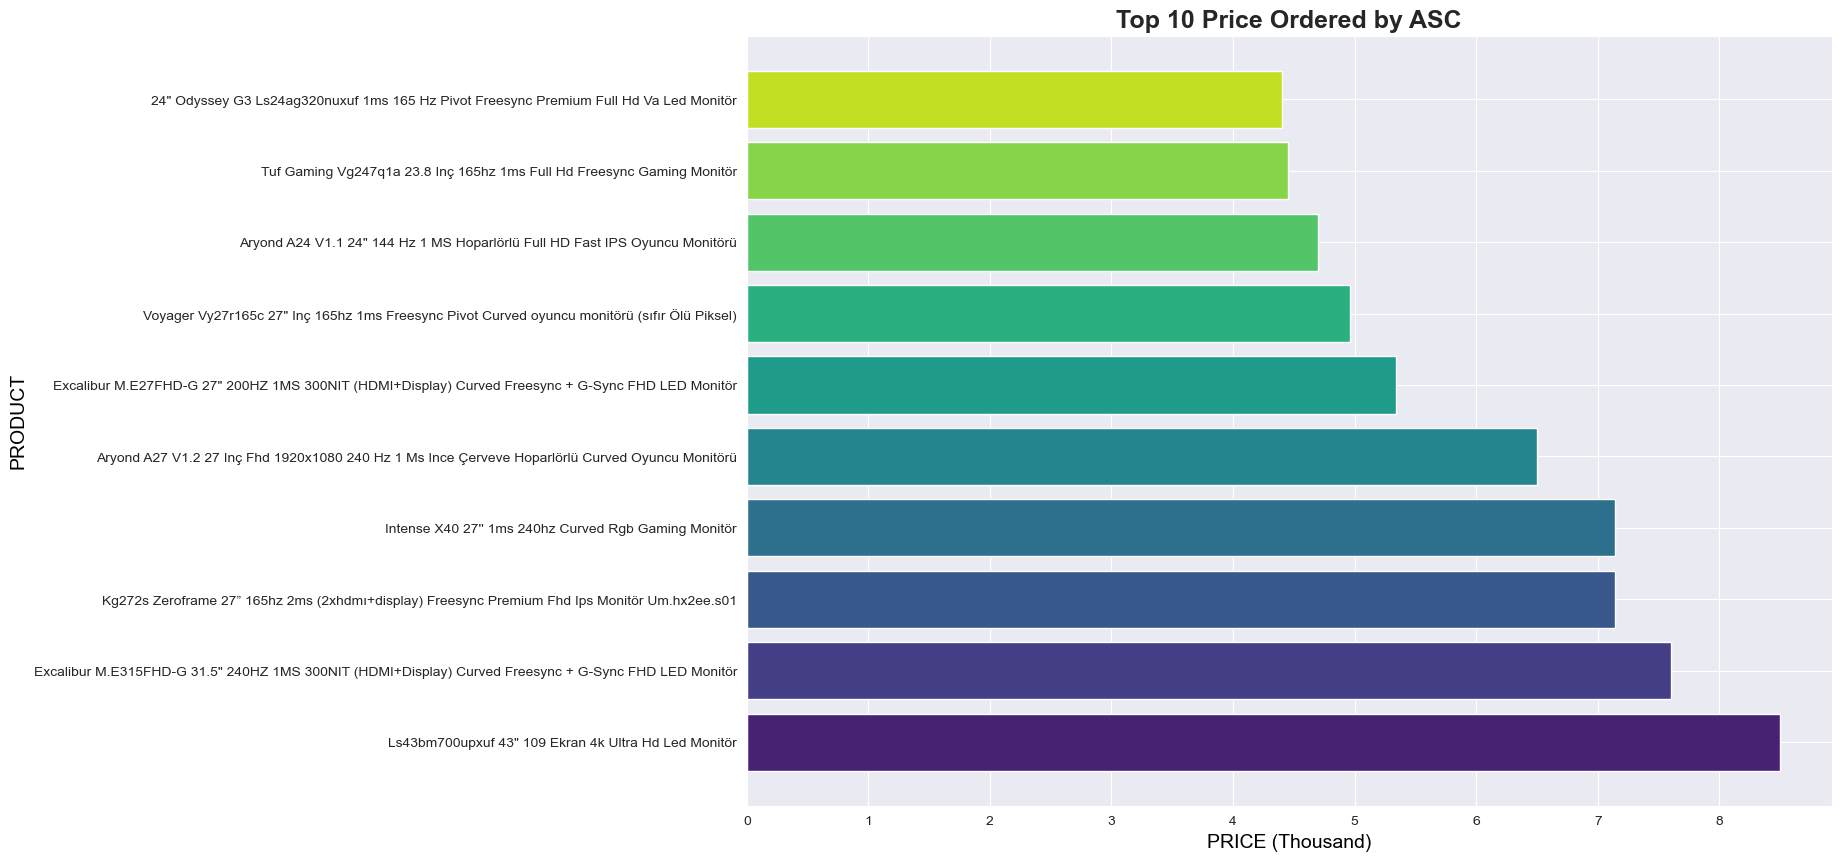

In [194]:
plt.figure(figsize=(14, 10))
bars = plt.barh(price_name_company['NAME'], price_name_company['PRICE'],color=sns.color_palette('viridis', len(price_name_company)))
plt.title('Top 10 Price Ordered by ASC', fontsize=18, fontweight='bold')
plt.xlabel('PRICE (Thousand)',fontsize=14,color='black')
plt.ylabel('PRODUCT',fontsize=14,color='black')
plt.show()

In [191]:
query_statement4 = f"""
SELECT Product_Name as NAME, Product_Company as COMPANY, Product_Evaluation as EVALUATION
FROM {table_name}
ORDER BY EVALUATION DESC
"""
query_output4 = pd.read_sql(query_statement4, conn)
print(query_statement4)
evaluation_name_company = pd.DataFrame(query_output4)
evaluation_name_company = evaluation_name_company.head(10)
evaluation_name_company


SELECT Product_Name as NAME, Product_Company as COMPANY, Product_Evaluation as EVALUATION
FROM SALES
ORDER BY EVALUATION DESC



,NAME,COMPANY,EVALUATION
0,"Excalibur M.E238FHD-G 23.8"" 200HZ 1MS 300NIT (...",Casper,1160
1,Tuf Gaming Vg247q1a 23.8 Inç 165hz 1ms Full Hd...,ASUS,1143
2,"24"" Odyssey G3 Ls24ag320nuxuf 1ms 165 Hz Pivot...",Samsung,914
3,"Redmi Rmmnt215nf 21.5"" 75hz 6ms Full Hd Monitör",Xiaomi,384
4,"Excalibur M.E315FHD-G 31.5"" 240HZ 1MS 300NIT (...",Casper,268
5,Ls24c360eauxuf S3 4ms Kavisli (CURVED) Hdmı Vg...,Samsung,239
6,"Excalibur M.E27FHD-G 27"" 200HZ 1MS 300NIT (HDM...",Casper,220
7,"Voyager Vy27r165c 27"" Inç 165hz 1ms Freesync P...",Rampage,149
8,Aryond A27 V1.2 27 Inç Fhd 1920x1080 240 Hz 1 ...,Monster,148
9,"Ls43bm700upxuf 43"" 109 Ekran 4k Ultra Hd Led M...",Samsung,122


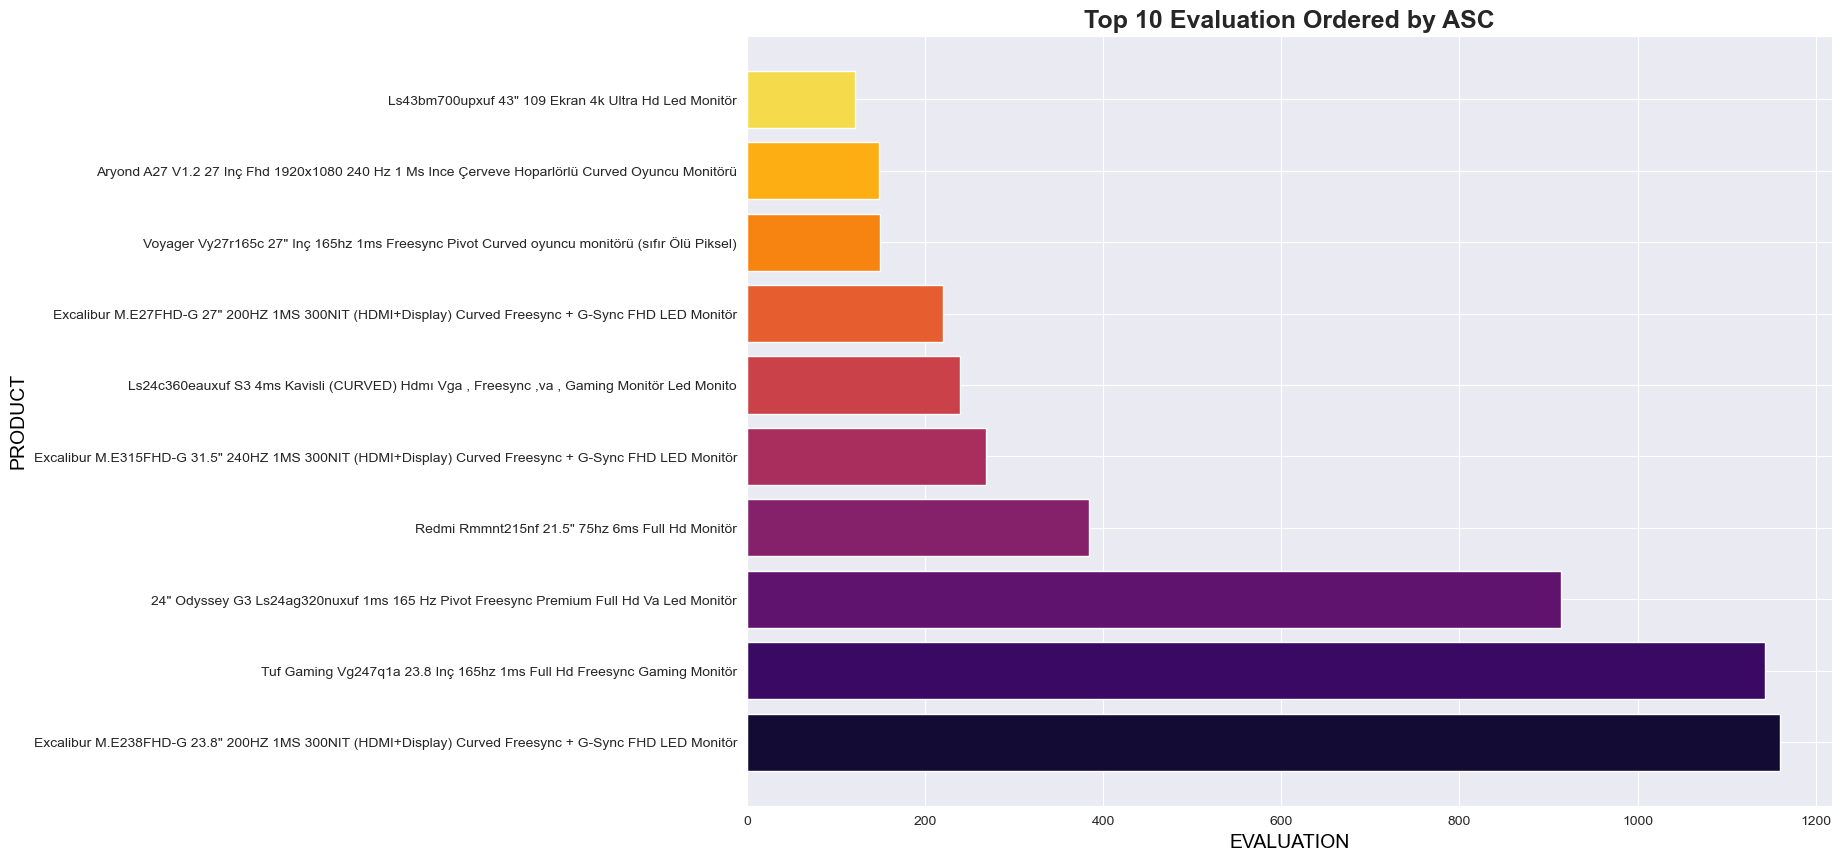

In [192]:
plt.figure(figsize=(14, 10))
bars = plt.barh(evaluation_name_company['NAME'], evaluation_name_company['EVALUATION'],color=sns.color_palette('inferno', len(evaluation_name_company)))
plt.title('Top 10 Evaluation Ordered by ASC', fontsize=18, fontweight='bold')
plt.xlabel('EVALUATION',fontsize=14,color='black')
plt.ylabel('PRODUCT',fontsize=14,color='black')
plt.show()

In [193]:
conn.close()

## CONCLUSION

- The highest product in the first 20 searches belongs to ACER with 7143 TRY.
- The highest evaluation in the first 20 searches belongs to ASUS with 1113.
- The highest share in the first 20 searches was Casper & Samsung with %19.
- There is no correlation between price and evaluation, but a high review is observed when the price is between 4k and 5k.
- The product with the highest price in the first 20 searches is Ls43bm700upxuf 43" 109 Screen 4k Ultra HD LED Monitor. It belongs to Samsung.
- The highest rating in the first 20 searches is Casper Excalibur M.E238FHD-G 23.8" 200HZ 1MS 300NIT (HDMI+Display) Curved Freesync + G-Sync FHD LED Monitor. It belongs to Casper.